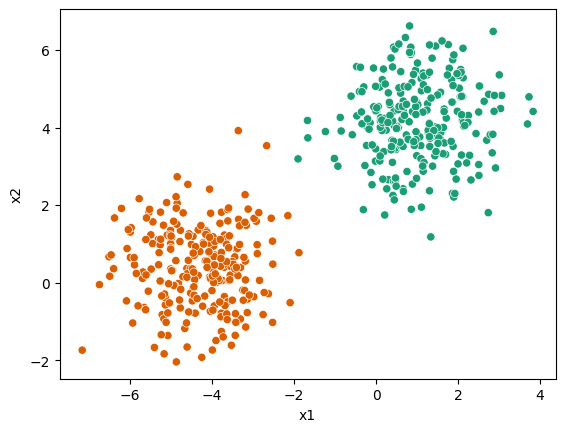

In [7]:
from pandas import DataFrame
import seaborn as sns
from sklearn.datasets import make_blobs

N_CLUSTERS = 2

data, true_labels = make_blobs(n_samples=500, centers=N_CLUSTERS, random_state=3)

points = DataFrame(data, columns=["x1", "x2"])
ax = sns.scatterplot(data=points, x="x1", y="x2", hue=true_labels, palette="Dark2")
ax.get_legend().set_visible(False)

x1        x2  distance  label
286 -0.929114  3.003234  0.619944      0
30  -1.014436  3.202181  0.715040      0
75  -1.899780  3.191116  0.774079      0
247 -2.147328  1.727181  1.149049      1
230 -1.660563  3.732856  1.162435      0

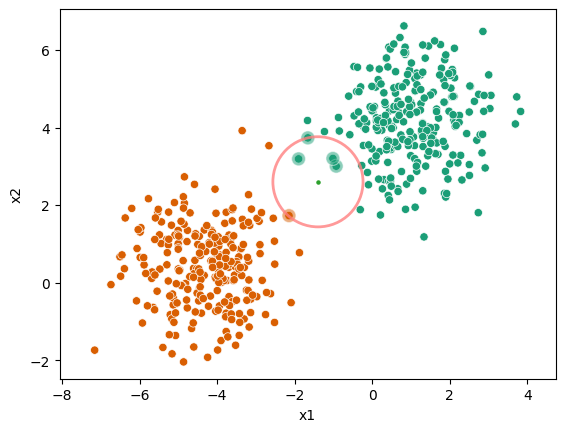

In [10]:
from matplotlib.patches import Circle
import numpy as np

#circle_centre = (-2.2, 3.5)
circle_centre = (-1.4, 2.6)
point_distances = np.sqrt(((points["x1"] - circle_centre[0]).pow(2) + (points["x2"] - circle_centre[1]).pow(2)))
closest_point_distances = point_distances.sort_values().iloc[0:5]
closest_points = points.loc[closest_point_distances.index]
closest_points["distance"] = closest_point_distances
closest_points["label"] = true_labels[closest_point_distances.index]

ax = sns.scatterplot(data=points, x="x1", y="x2", hue=true_labels, palette="Dark2")
sns.scatterplot(data=closest_points, x="x1", y="x2", hue="label", palette="Dark2", s=100, alpha=0.5)
ax.get_legend().set_visible(False)
ax.scatter([circle_centre[0]], [circle_centre[1]], s=5)
ax.add_patch(Circle(circle_centre, radius=closest_points["distance"].iloc[-1], facecolor="None", edgecolor=(1, 0.5, 0.5), linewidth=2, alpha=0.8))
ax.axis("equal")
closest_points

In [52]:
from collections import defaultdict

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import cm
from sklearn.cluster import KMeans

# First set up the figure, the axis, and the plot element we want to animate
with plt.xkcd():
    fig, ax = plt.subplots(constrained_layout=True)
#fig.set_constrained_layout_pads(w_pad=10/72, h_pad=10/72)
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
ax.axis("equal")

ax.set_xlim(-5, 2)
ax.set_ylim(0, 5)

cmap = cm.Dark2

# Here we create the initial path objects which will be altered each frame.
p = sns.scatterplot(data=points, x="x1", y="x2", hue=true_labels, palette="Dark2", s=40, alpha=0.8, ax=ax).get_children()[0]
ax.get_legend().set_visible(False)
#x = ax.scatter([circle_centre[0]], [circle_centre[1]], c="red", s=200, marker="x")
c = ax.add_patch(Circle(circle_centre, radius=0.0, facecolor="None", edgecolor="black", linewidth=2, alpha=0.6))

FPS = 30
ANIMATION_LENGTH = 6.0  # seconds

times_drawn = defaultdict(int)

def animate(i):
    max_radius = closest_points.iloc[-1]["distance"]*1.01
    end_pause = 2.0  # seconds
    max_radius_time = ANIMATION_LENGTH - end_pause  # seconds
    
    time=i/FPS
    new_radius = min(max_radius*(time/max_radius_time), max_radius)  # grow up to max_radius in max_radius_time
    
    c.set_radius(new_radius)
    
    for index, row in closest_points.iterrows():
        if new_radius >= row["distance"]:
            if times_drawn[index] > 0:
                continue
            color = cmap.colors[int(round(row["label"]))]
            ax.scatter([row["x1"]], [row["x2"]], s=160, color=color, alpha=0.5)
            with plt.xkcd():
                ax.plot([circle_centre[0], row["x1"]], [circle_centre[1], row["x2"]], color=color, lw=2, alpha=0.6, zorder=-10)
            times_drawn[index] += 1

    return p,

anim = animation.FuncAnimation(fig, animate, frames=int(FPS*ANIMATION_LENGTH), interval=1000/FPS, blit=True)

#anim.save("kmeans.mp4", extra_args=["-vcodec", "libx264"])
anim.save("knn.gif", writer="imagemagick")

In [39]:
!gifsicle -b -O3 knn.gif

gifsicle:knn.gif: warning: too many colors, using local colormaps
  (You may want to try ‘--colors 256’.)
